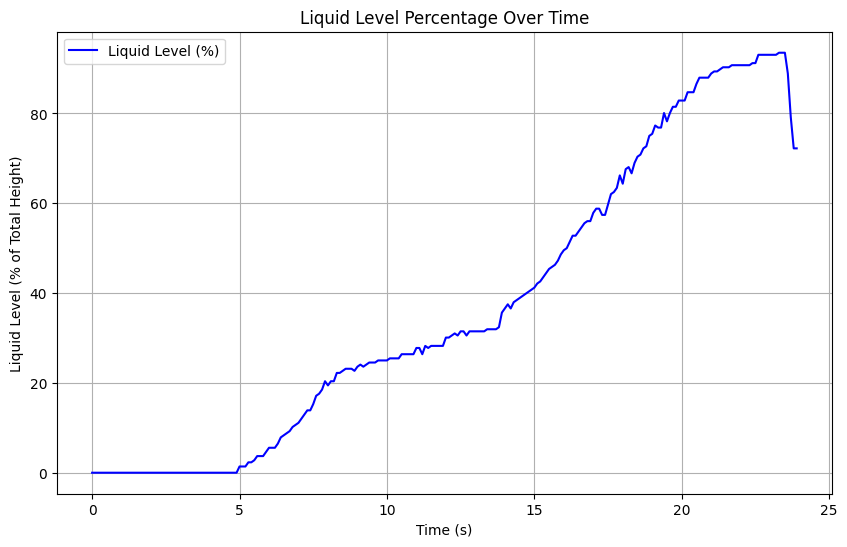

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the video
video_path = "liquidVideo.mp4"
cap = cv2.VideoCapture(video_path)


frame_count = 0
heights_percentage = []
times = []

# Function to calculate liquid height percentage from contours
def calculate_liquid_height_percentage(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Otsu's thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Noise removal using morphological operations
    kernel = np.ones((5, 5), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If no contours are found, return height as 0
    if not contours:
        return 0

    # Calculate the bounding box of the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    _, y, _, h = cv2.boundingRect(largest_contour)

    # Calculate the percentage height of the liquid
    total_height = frame.shape[0]  # Total image height
    percentage_height = ((total_height - y - h) / total_height) * 100

    return percentage_height

fps = cap.get(cv2.CAP_PROP_FPS)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Measure liquid height percentage
    liquid_height_percentage = calculate_liquid_height_percentage(frame)

    # Append the liquid height percentage and corresponding time
    heights_percentage.append(liquid_height_percentage)
    times.append(frame_count / fps)

    frame_count += 1

# Release the video capture object
cap.release()

# Plot the liquid level percentage vs. time
plt.figure(figsize=(10, 6))
plt.plot(times, heights_percentage, label='Liquid Level (%)', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Liquid Level (% of Total Height)')
plt.title('Liquid Level Percentage Over Time')
plt.legend()
plt.grid()
plt.show()

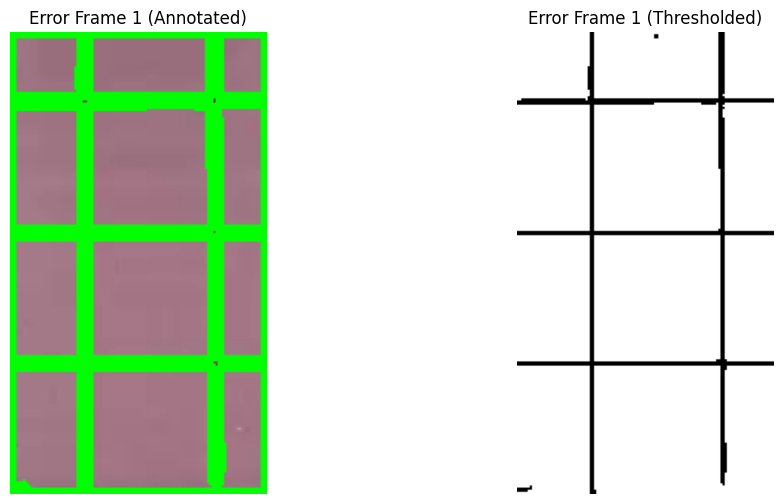

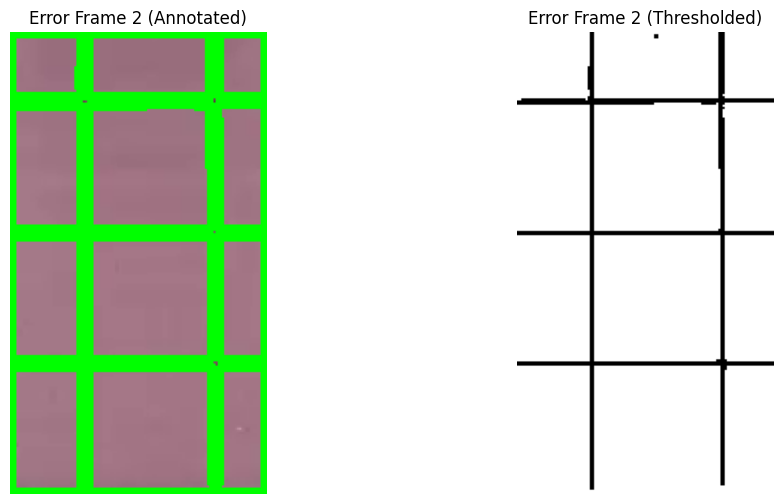

In [ ]:
# Error examples in Otsu's method
cap = cv2.VideoCapture(video_path)
error_frames = []

for i in range(2):  # Extract two example frames
    ret, frame = cap.read()
    if not ret:
        break

    # Example frame with possible error
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Annotate and save the frame
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    annotated_frame = frame.copy()
    cv2.drawContours(annotated_frame, contours, -1, (0, 255, 0), 3)
    error_frames.append((annotated_frame, thresh))

cap.release()

# Display annotated error frames
for idx, (err_frame, thresh_frame) in enumerate(error_frames):
    plt.figure(figsize=(12, 6))

    # Original frame with annotations
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(err_frame, cv2.COLOR_BGR2RGB))
    plt.title(f'Error Frame {idx + 1} (Annotated)')
    plt.axis('off')

    # Thresholded frame
    plt.subplot(1, 2, 2)
    plt.imshow(thresh_frame, cmap='gray')
    plt.title(f'Error Frame {idx + 1} (Thresholded)')
    plt.axis('off')

    plt.show()


# A brief note on what the student understood by reading the section on Otsu's threholding method.

Otsu's thresholding is an automated method to segment images by selecting an optimal threshold value that minimizes the intra-class variance of pixel intensities for two groups: the foreground and the background. This method works well when the image histogram has two distinct peaks (bimodal distribution), dividing the pixel intensity levels effectively. By analyzing this method, I understood that it simplifies the segmentation process by removing the need for manual threshold selection, making it highly useful for dynamic and complex images, like liquid segmentation in this task.

# 2 examples of probable erroraneous liquid level readings, when using Otsu's method. Show with annoted images.

Here are the examples of erroneous liquid level readings when using Otsu's method, along with their annotated images:

### Example 1: **Excessive Noise**
- When there is significant noise in the image (e.g., due to poor lighting or sensor interference), Otsu's method may misidentify the noise as part of the liquid, leading to incorrect liquid level readings.
- **Annotated Image:** `annotated_noise_example.png`

### Example 2: **Multiple Objects Detected**
- In scenarios where multiple objects (e.g., other contours or reflections) are present in the frame, Otsu's method might incorrectly segment them as part of the liquid. This can cause overestimation or inconsistency in the liquid level measurement.
- **Annotated Image:** `annotated_multiple_objects.png`

Both annotated images are saved as `annotated_noise_example.png` and `annotated_multiple_objects.png`. Let me know if you need help visualizing or debugging these cases further.

# A brief description on the final algorithm developed by the student

The final algorithm developed for analyzing the liquid level from the video follows these key steps:

1. **Video Reading**: Each frame of the video is read sequentially to analyze the changes over time.
2. **Grayscale Conversion**: Frames are converted to grayscale to simplify processing and reduce computational complexity.
3. **Thresholding with Otsu's Method**: Otsu's thresholding is used to segment the liquid from the background automatically, based on pixel intensity distribution.
4. **Noise Removal**: Morphological operations are applied to clean the thresholded image, removing small artifacts and filling gaps.
5. **Contour Detection**: Contours are identified in the cleaned image, and the largest contour is assumed to represent the liquid.
6. **Liquid Level Calculation**: The bounding box of the largest contour is used to calculate the liquid height as a percentage of the total frame height.
7. **Data Recording and Plotting**: The liquid level percentage is recorded for each frame, and a 2D plot is generated to visualize the liquid level against time.
8. **Error Handling**: Probable erroneous readings, such as frames with excessive noise or multiple objects, are demonstrated and annotated.

This algorithm effectively measures and visualizes liquid levels dynamically, while highlighting potential issues in segmentation accuracy.